In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  

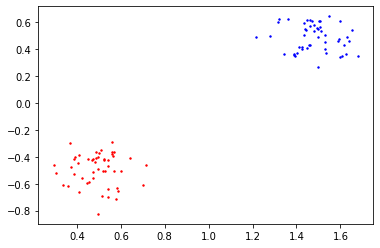

In [2]:
P_X = 0.5
P_Y =0.5

points_1 = np.random.multivariate_normal(mean=(-P_X+1,-P_Y), cov=[[0.01,0],[0,0.01]],size=(50,))
points_m1 = np.random.multivariate_normal(mean=(P_X+1,P_Y), cov=[[0.01,0],[0,0.01]],size=(50,)) 

plt.close()
plt.scatter(points_1[:,0],points_1[:,1], s=2,color='red');
plt.scatter(points_m1[:,0],points_m1[:,1], s=2,color='blue');


In [3]:
Y = np.concatenate((1*np.ones(points_1.shape[0]),-1*np.ones(points_m1.shape[0])))

In [4]:
points_m1.shape 

(50, 2)

In [5]:
X = np.concatenate((points_1,points_m1),axis=0)
X = np.concatenate((X, np.ones(X.shape[0]).reshape(-1,1)),axis=-1)

In [6]:
from tqdm import tqdm 

100%|██████████| 100/100 [00:00<00:00, 96598.43it/s]


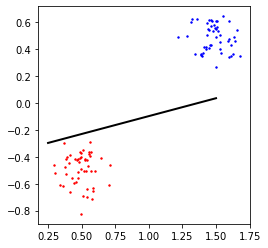

In [21]:
w = np.random.randint(-10,10,3)
converged = False 
while not (converged): 
    converged = True
    for i in tqdm(range(len(Y))): 
        x_i = X[i,:].reshape(-1)
        y_i = Y[i]
        if(np.sign(w@x_i) != y_i): 
            w = w + x_i*y_i
            converged = False
decision_x = np.linspace(0.25,1.5,5)
decision_y = -(w[0]*decision_x + w[-1])/w[1]
fig, ax = plt.subplots()
ax.scatter(points_1[:,0],points_1[:,1], s=2,color='red')
ax.scatter(points_m1[:,0],points_m1[:,1], s=2,color='blue')
ax.plot(decision_x,decision_y,color='black',linewidth=2)
ax.axis('equal')
ax.set_aspect('equal', 'box')
plt.savefig("PERCEPTRON_OUT" + str(np.random.randint(0,100)) + ".png")